In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from scipy.stats import ttest_1samp, wilcoxon, shapiro, levene, f_oneway, mannwhitneyu


# Question 1

In [23]:
auto=pd.read_csv("Automobile.csv")

In [24]:
auto.head()

symboling  normalized_losses         make fuel_type aspiration  \
0          3                168  alfa-romero       gas        std   
1          3                168  alfa-romero       gas        std   
2          1                168  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  number_of_doors   body_style drive_wheels engine_location  wheel_base  \
0             two  convertible          rwd           front        88.6   
1             two  convertible          rwd           front        88.6   
2             two    hatchback          rwd           front        94.5   
3            four        sedan          fwd           front        99.8   
4            four        sedan          4wd           front        99.4   

   ...    engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0  ...            130         mpfi  3.47    2.68               9.0        111   
1  ...            130         mpfi  3.47    2.68               9.0        111   
2  ...            152         mpfi  2.68    3.47               9.0        154   
3  ...            109         mpfi  3.19    3.40              10.0        102   
4  ...            136         mpfi  3.19    3.40               8.0        115   

   peak_rpm city_mpg  highway_mpg  price  
0      5000       21           27  13495  
1      5000       21           27  16500  
2      5000       19           26  16500  
3      5500       24           30  13950  
4      5500       18           22  17450  

[5 rows x 26 columns]

In [ ]:
#A part

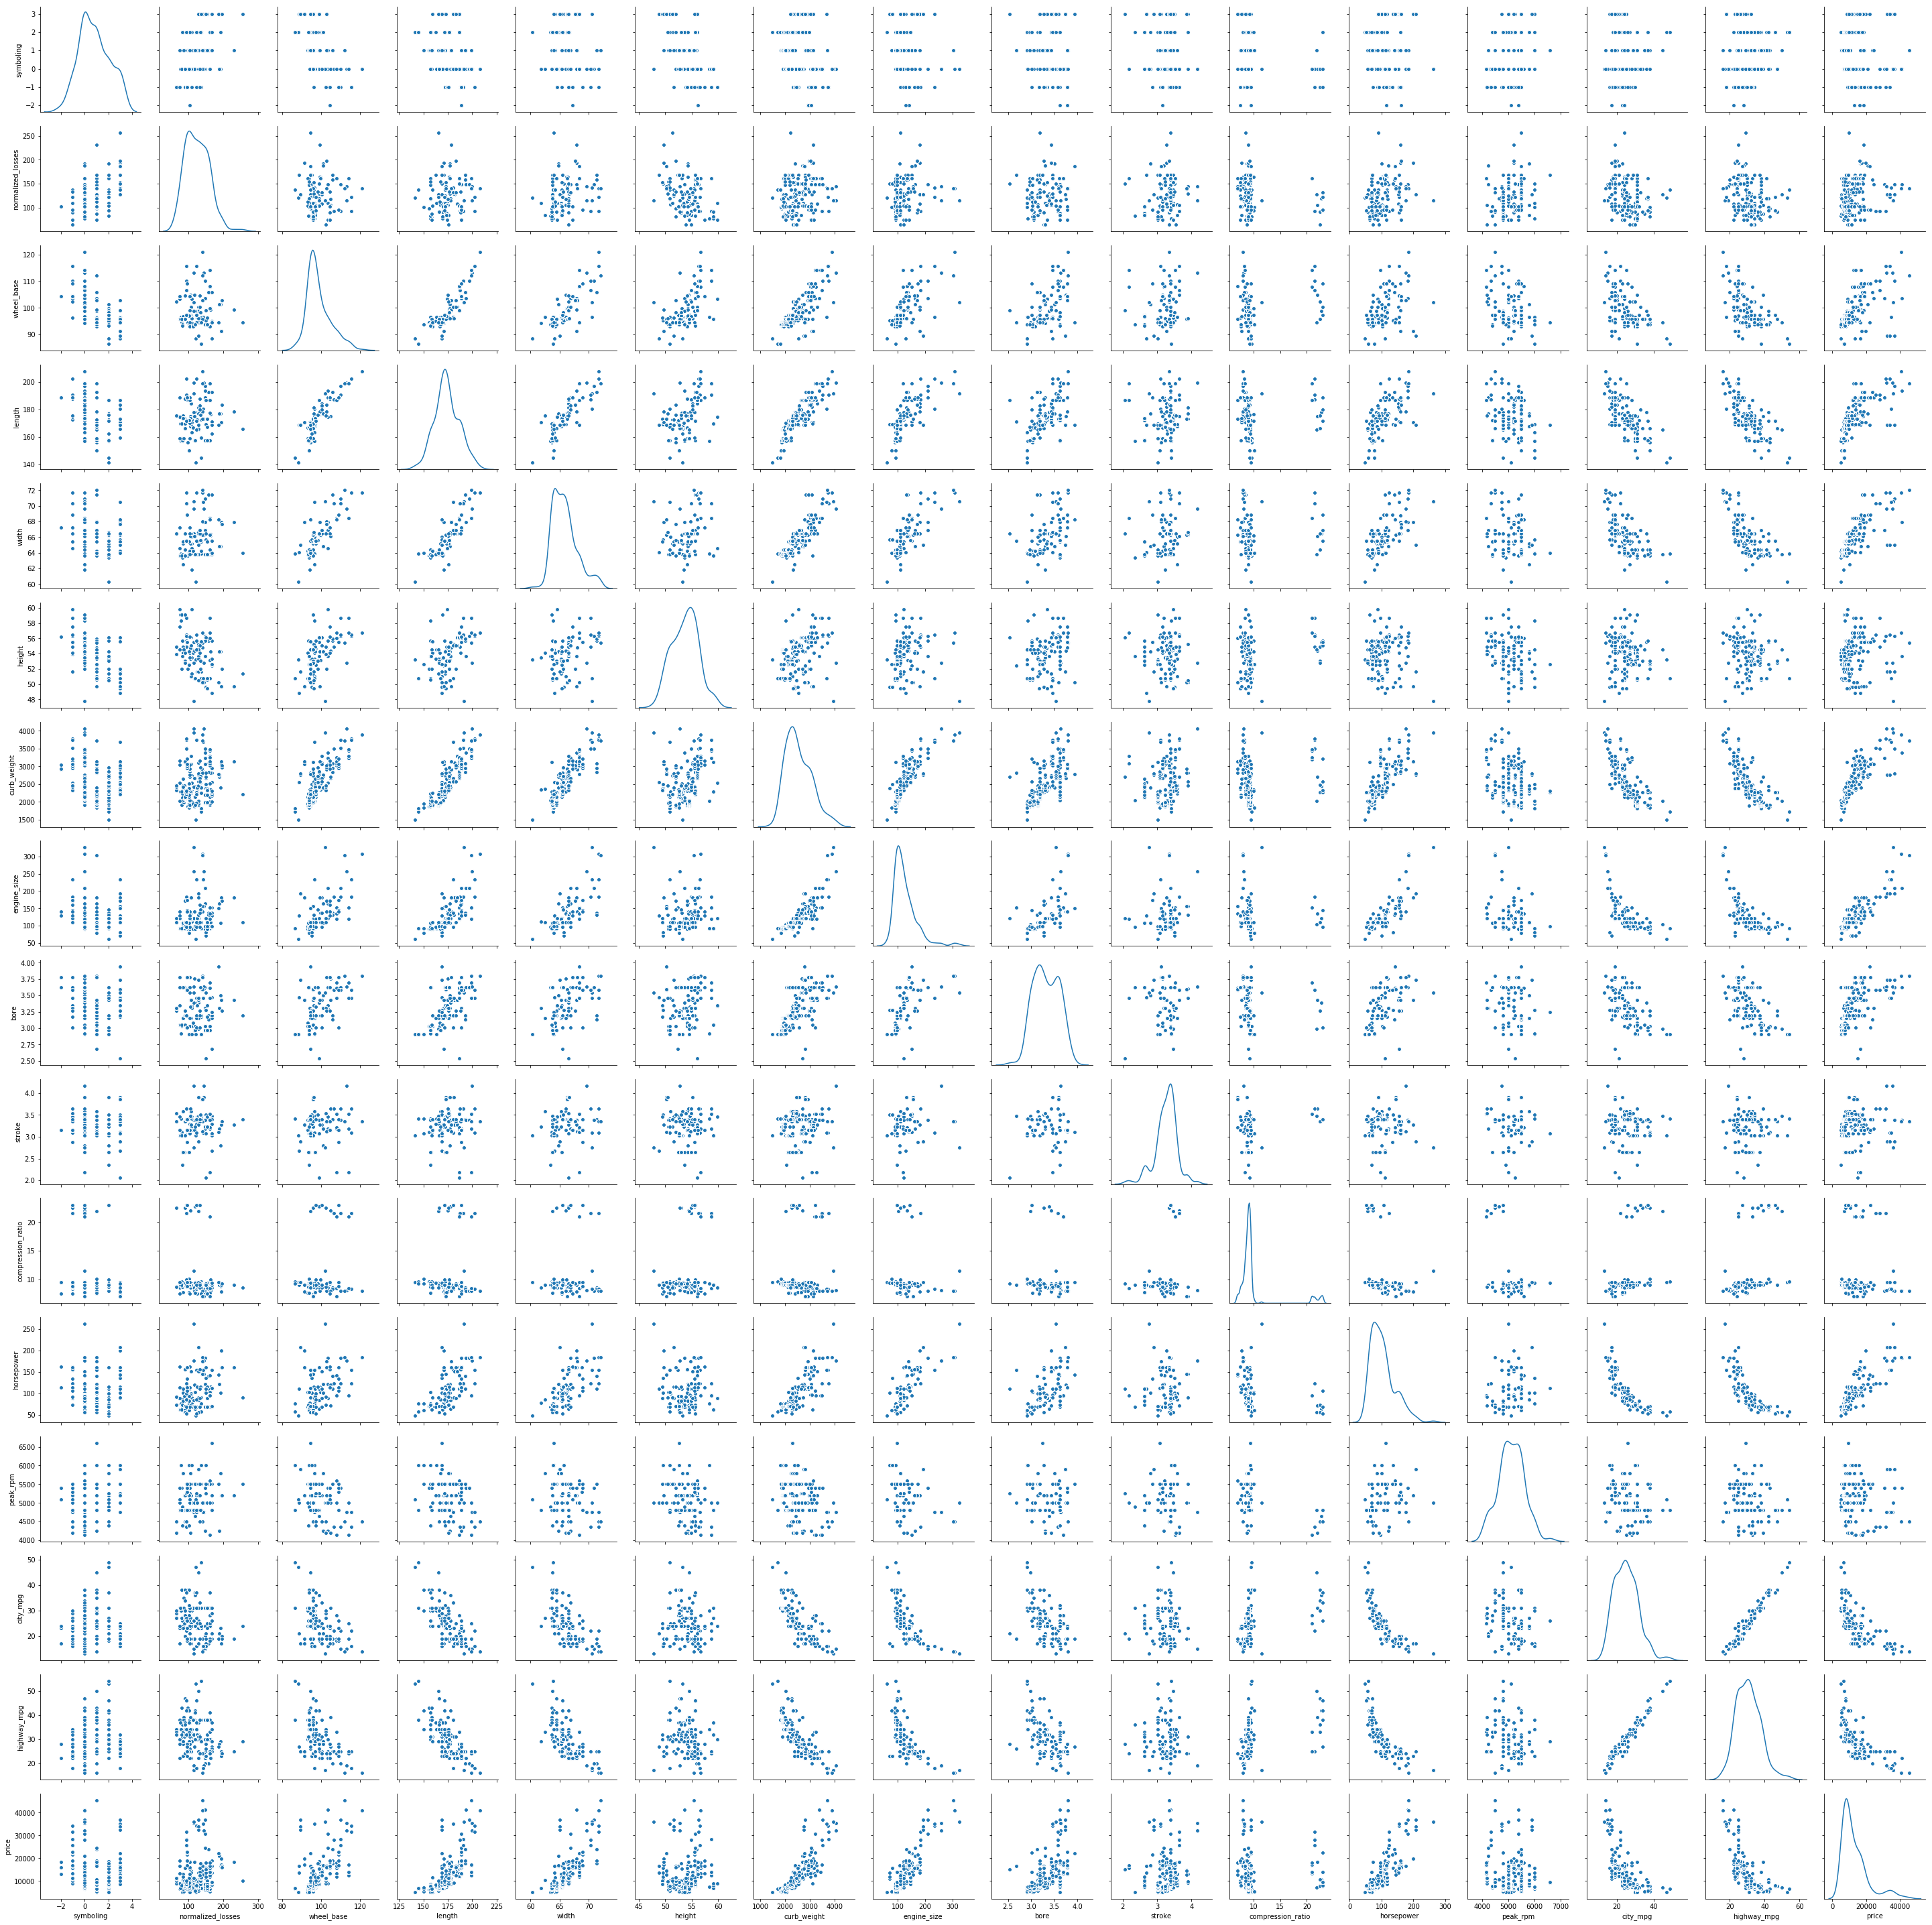

In [25]:
sns.pairplot(auto,diag_kind="kde")

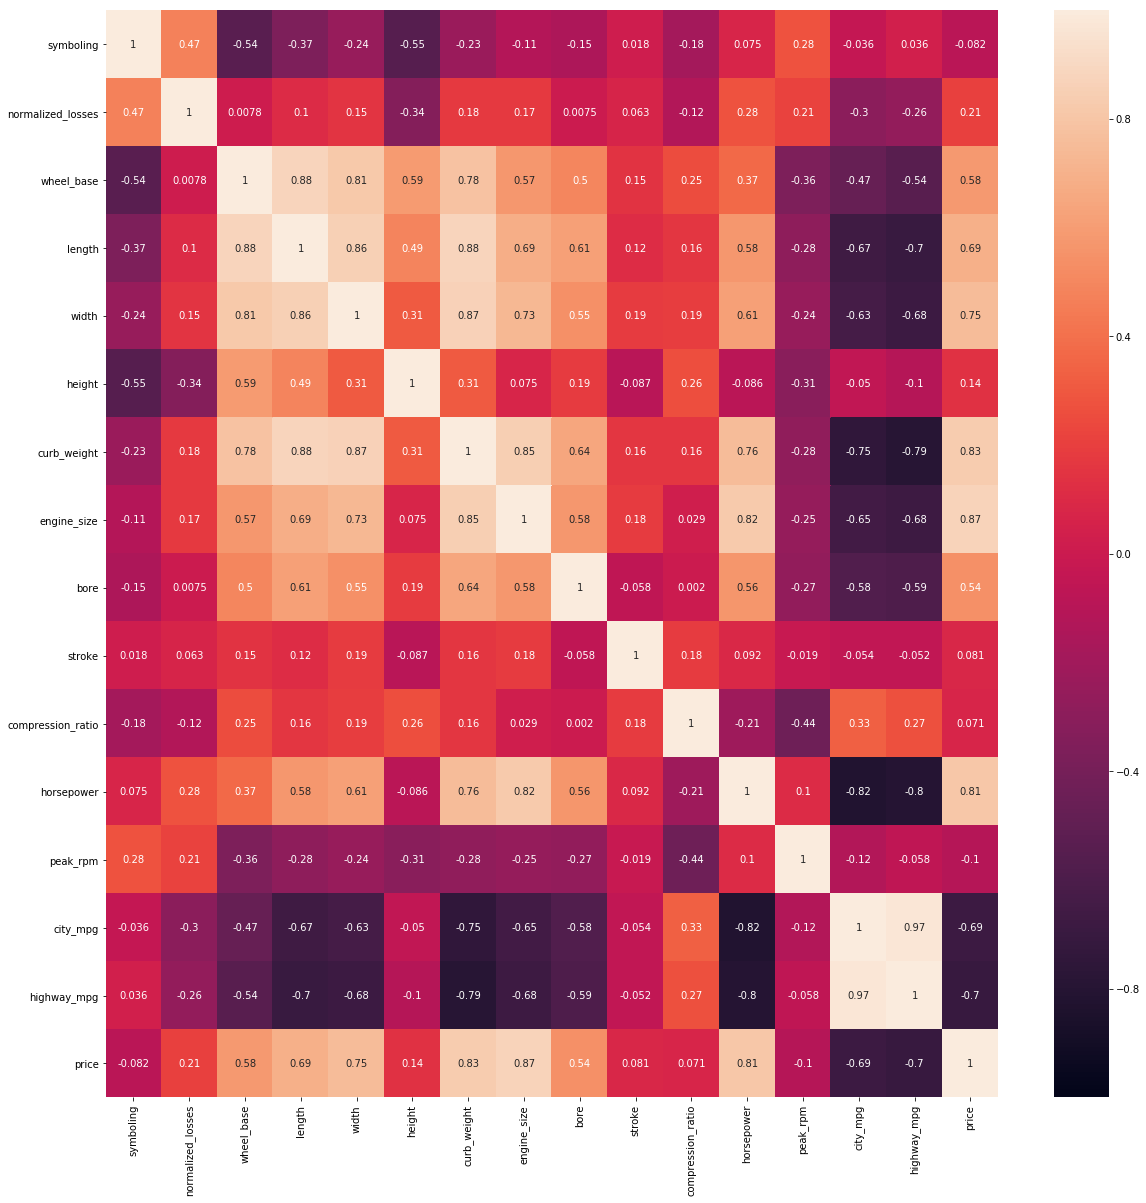

In [197]:
plt.figure(figsize=(20,20)) # 20X20 inches
sns.heatmap(auto.corr(), vmin=-1, vmax=+1, annot=True)


In [27]:
auto.corr()

symboling  normalized_losses  wheel_base    length  \
symboling           1.000000           0.474993   -0.535987 -0.365404   
normalized_losses   0.474993           1.000000    0.007815  0.103659   
wheel_base         -0.535987           0.007815    1.000000  0.876024   
length             -0.365404           0.103659    0.876024  1.000000   
width              -0.242423           0.153752    0.814507  0.857170   
height             -0.550160          -0.335476    0.590742  0.492063   
curb_weight        -0.233118           0.178547    0.782097  0.880665   
engine_size        -0.110581           0.174788    0.572027  0.685025   
bore               -0.146355           0.007498    0.495210  0.610324   
stroke              0.018373           0.062666    0.148239  0.116745   
compression_ratio  -0.182196          -0.120846    0.250313  0.159733   
horsepower          0.075287           0.276665    0.372607  0.577923   
peak_rpm            0.279849           0.211812   -0.362642 -0.281932   
city_mpg           -0.035527          -0.301206   -0.470606 -0.665192   
highway_mpg         0.036233          -0.264594   -0.543304 -0.698142   
price              -0.082391           0.208886    0.584642  0.690628   

                      width    height  curb_weight  engine_size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.146355   
normalized_losses  0.153752 -0.335476     0.178547     0.174788  0.007498   
wheel_base         0.814507  0.590742     0.782097     0.572027  0.495210   
length             0.857170  0.492063     0.880665     0.685025  0.610324   
width              1.000000  0.306002     0.866201     0.729436  0.545028   
height             0.306002  1.000000     0.307581     0.074694  0.186701   
curb_weight        0.866201  0.307581     1.000000     0.849072  0.644871   
engine_size        0.729436  0.074694     0.849072     1.000000  0.577265   
bore               0.545028  0.186701     0.644871     0.577265  1.000000   
stroke             0.186352 -0.086508     0.162179     0.184605 -0.057887   
compression_ratio  0.189867  0.259737     0.156433     0.028889  0.001971   
horsepower         0.613488 -0.085544     0.757762     0.821685  0.563921   
peak_rpm          -0.242569 -0.311922    -0.279027    -0.254961 -0.269486   
city_mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.576954   
highway_mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.586917   
price              0.751265  0.135486     0.834415     0.872335  0.543052   

                     stroke  compression_ratio  horsepower  peak_rpm  \
symboling          0.018373          -0.182196    0.075287  0.279849   
normalized_losses  0.062666          -0.120846    0.276665  0.211812   
wheel_base         0.148239           0.250313    0.372607 -0.362642   
length             0.116745           0.159733    0.577923 -0.281932   
width              0.186352           0.189867    0.613488 -0.242569   
height            -0.086508           0.259737   -0.085544 -0.311922   
curb_weight        0.162179           0.156433    0.757762 -0.279027   
engine_size        0.184605           0.028889    0.821685 -0.254961   
bore              -0.057887           0.001971    0.563921 -0.269486   
stroke             1.000000           0.183855    0.092493 -0.019004   
compression_ratio  0.183855           1.000000   -0.212984 -0.437263   
horsepower         0.092493          -0.212984    1.000000  0.104645   
peak_rpm          -0.019004          -0.437263    0.104645  1.000000   
city_mpg          -0.053955           0.331425   -0.820400 -0.117699   
highway_mpg       -0.051793           0.268465   -0.804241 -0.058054   
price              0.081434           0.071107    0.810795 -0.104846   

                   city_mpg  highway_mpg     price  
symboling         -0.035527     0.036233 -0.082391  
normalized_losses -0.301206    -0.264594  0.208886  
wheel_base        -0.470606    -0.543304  0.584642  
length            -0.665192   

(array([11., 45., 24., 56., 18., 31., 13.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <a list of 10 Patch objects>)

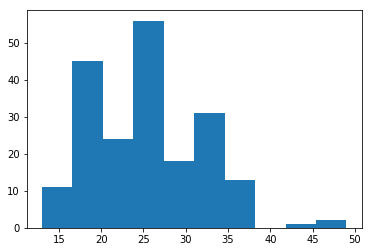

In [18]:
plt.hist(auto['city_mpg'])

In [20]:
auto["compression_ratio"].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      6
8.60      5
8.40      5
7.50      5
21.00     5
23.00     5
7.60      4
21.50     4
22.50     3
8.30      3
8.80      3
9.60      3
7.70      2
8.10      2
10.00     2
9.31      1
21.90     1
9.41      1
22.00     1
11.50     1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compression_ratio, dtype: int64

In [26]:
auto["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [28]:
auto["fuel_type"].value_counts()

gas       181
diesel     20
Name: fuel_type, dtype: int64

In [29]:
auto["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [31]:
auto["number_of_doors"].value_counts()

four    114
two      87
Name: number_of_doors, dtype: int64

In [32]:
auto["body_style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [34]:
auto["drive_wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [35]:
auto["engine_location"].value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

In [36]:
auto["fuel_system"].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel_system, dtype: int64

In [37]:
auto["symboling"].value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [39]:
auto.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [41]:
#c part

m0=smf.ols("city_mpg~symboling+normalized_losses+make+fuel_type+aspiration+number_of_doors+body_style+drive_wheels+engine_location+wheel_base+length+width+height+curb_weight+engine_type+number_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg+price", auto).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               city_mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.538e+27
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:28:49   Log-Likelihood:                 5695.4
No. Observations:                 201   AIC:                        -1.127e+04
Df Residuals:                     139   BIC:                        -1.106e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      7.105e-13   9.26e-13      0.767      0.444   -1.12e-12    2.54e-12
make[T.audi]                   2.967e-13   2.05e-13      1.449      0.150   -1.08e-13    7.01e-13
make[T.bmw]                    2.327e-13   2.01e-13      1.159      0.249   -1.64e-13     6.3e-13
make[T.chevrolet]             -1.421e-14   1.92e-13     -0.074      0.941   -3.93e-13    3.65e-13
make[T.dodge]                  3.197e-14    1.6e-13      0.199      0.842   -2.85e-13    3.49e-13
make[T.honda]                  3.908e-14   1.83e-13      0.214      0.831   -3.22e-13       4e-13
make[T.isuzu]                  8.882e-14   2.06e-13      0.431      0.667   -3.19e-13    4.97e-13
make[T.jaguar]                  2.46e-13   2.31e-13      1.066      0.288    -2.1e-13    7.02e-13
make[T.mazda]                  1.323e-13   1.43e-13      0.925      0.357   -1.51e-13    4.15e-13
make[T.mercedes-benz]          3.446e-13   2.07e-13      1.665      0.098   -6.46e-14    7.54e-13
make[T.mercury]                2.596e-13   2.46e-13      1.055      0.293   -2.27e-13    7.46e-13
make[T.mitsubishi]             6.661e-14   1.62e-13      0.410      0.682   -2.54e-13    3.88e-13
make[T.nissan]                 1.332e-13   1.43e-13      0.930      0.354    -1.5e-13    4.17e-13
make[T.peugot]                 7.105e-15   1.57e-13      0.045      0.964   -3.03e-13    3.17e-13
make[T.plymouth]               2.665e-15   1.58e-13      0.017      0.987    -3.1e-13    3.15e-13
make[T.porsche]                1.084e-13   2.48e-13      0.438      0.662   -3.81e-13    5.98e-13
make[T.renault]                1.847e-13   1.97e-13      0.936      0.351   -2.05e-13    5.75e-13
make[T.saab]                   1.137e-13    1.8e-13      0.633      0.528   -2.42e-13    4.69e-13
make[T.subaru]                         0   1.38e-13          0      1.000   -2.72e-13    2.72e-13
make[T.toyota]                 1.386e-13   1.33e-13      1.045      0.298   -1.23e-13    4.01e-13
make[T.volkswagen]             7.105e-14   1.56e-13      0.456      0.649   -2.37e-13    3.79e-13
make[T.volvo]                  1.759e-13   1.82e-13      0.968      0.334   -1.83e-13    5.35e-13
fuel_type[T.gas]               4.263e-13   4.68e-13      0.910      0.364      -5e-13    1.35e-12
aspiration[T.turbo]            3.109e-14   6.87e-14      0.452      0.652   -1.05e-13    1.67e-13
number_of_doors[T.two]         2.665e-15   4.16e-14      0.064      0.949   -7.95e-14    8.48e-14
body_style[T.hardtop]          2.842e-14   9.94e-14      0.286      0.775   -1.68e-13    2.25e-13
body_style[T.hatchback]        5.684e-14   9.39e-14      0.605      0.546   -1.29e-13    2.43e-13
body_style[T.sedan]            9.592e-14      1e-13      0.957      0.340   -1.02e-13    2.94e-13
body_style[T.wagon]            8.882e-14   1.

In [42]:
auto["symboling"].value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [48]:
#to identify the independent variables we need to perform Annova Test
auto1= auto.groupby("symboling")
sym1=auto1.get_group(0)
sym2=auto1.get_group(1)
sym3=auto1.get_group(2)
sym4=auto1.get_group(3)
sym5=auto1.get_group(-1)
sym6=auto1.get_group(-2)

s1=sym1['city_mpg']
s2=sym2['city_mpg']
s3=sym3['city_mpg']
s4=sym4['city_mpg']
s5=sym5['city_mpg']
s6=sym6['city_mpg']


In [49]:
f_oneway(s1,s2,s3,s4,s5,s6)

#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=11.402105346411926, pvalue=1.1546197292650382e-09)

In [51]:
auto["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [54]:
auto2= auto.groupby("make")
maker1=auto2.get_group('toyota')
maker2=auto2.get_group('nissan')
maker3=auto2.get_group('mazda' )
maker4=auto2.get_group('mitsubishi')
maker5=auto2.get_group('honda' )
maker6=auto2.get_group('volkswagen')
maker7=auto2.get_group('subaru')
maker8=auto2.get_group('peugot')
maker9=auto2.get_group('volvo')
maker10=auto2.get_group('dodge')
maker11=auto2.get_group('bmw')
maker12=auto2.get_group('mercedes-benz')
maker13=auto2.get_group('plymouth')
maker14=auto2.get_group('audi')
maker15=auto2.get_group('saab')
maker16=auto2.get_group('porsche')
maker17=auto2.get_group('jaguar')
maker18=auto2.get_group('chevrolet')
maker19=auto2.get_group('isuzu')
maker20=auto2.get_group('renault')
maker21=auto2.get_group('mercury')

m1=maker1['city_mpg']
m2=maker2['city_mpg']
m3=maker3['city_mpg']
m4=maker4['city_mpg']
m5=maker5['city_mpg']
m6=maker6['city_mpg']
m7=maker7['city_mpg']
m8=maker8['city_mpg']
m9=maker9['city_mpg']
m10=maker10['city_mpg']
m11=maker11['city_mpg']
m12=maker12['city_mpg']
m13=maker13['city_mpg']
m14=maker14['city_mpg']
m15=maker15['city_mpg']
m16=maker16['city_mpg']
m17=maker17['city_mpg']
m18=maker18['city_mpg']
m19=maker19['city_mpg']
m20=maker20['city_mpg']
m21=maker21['city_mpg']


In [55]:
f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18, m19,m20,m21)
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=6.6118332186136275, pvalue=2.965166521975402e-13)

In [57]:
auto["body_style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [61]:
auto3= auto.groupby("body_style")
sty1=auto3.get_group('sedan')
sty2=auto3.get_group('hatchback')
sty3=auto3.get_group('hardtop')
sty4=auto3.get_group('convertible')

bs1=sty1['city_mpg']
bs2=sty2['city_mpg']
bs3=sty3['city_mpg']
bs4=sty4['city_mpg']


In [63]:
f_oneway(bs1,bs2,bs3,bs4)
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=2.8368238144546414, pvalue=0.039650947562690886)

In [64]:
auto["drive_wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [66]:
auto4= auto.groupby("drive_wheels")
dw1=auto4.get_group('fwd')
dw2=auto4.get_group('rwd')
dw3=auto4.get_group('4wd')

d1=dw1['city_mpg']
d2=dw2['city_mpg']
d3=dw3['city_mpg']


In [67]:
f_oneway(d1,d2,d3)
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=45.76918210409612, pvalue=4.5808735805016806e-17)

In [71]:
auto5=auto.groupby('engine_type')
et1=auto5.get_group("ohc")
et2=auto5.get_group("ohcf")
et3=auto5.get_group("ohcv")
et4=auto5.get_group("l")
et5=auto5.get_group("dohc")
et6=auto5.get_group("rotor")
f_oneway(et1["city_mpg"],et2["city_mpg"],et3["city_mpg"],et4["city_mpg"],et5["city_mpg"],et6["city_mpg"])
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=11.54544415919199, pvalue=8.875668229153766e-10)

In [73]:
cyl=auto.groupby('number_of_cylinders')
cyl4=cyl.get_group("four")
cyl6=cyl.get_group("six")
cyl5=cyl.get_group("five")
cyl8=cyl.get_group("eight")
cyl2=cyl.get_group("two")
cyl12=cyl.get_group("twelve")
cyl3=cyl.get_group("three")
f_oneway(cyl4["city_mpg"],cyl6["city_mpg"],cyl5["city_mpg"],cyl8["city_mpg"],cyl2["city_mpg"],cyl12["city_mpg"],cyl3["city_mpg"])
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

F_onewayResult(statistic=21.0101572362326, pvalue=6.300286778937588e-19)

In [76]:
fs=auto.groupby('fuel_system')
fs1=fs.get_group("mpfi")
fs2=fs.get_group("2bbl")
fs3=fs.get_group("idi")
fs4=fs.get_group("1bbl")
fs5=fs.get_group("spdi")
fs6=fs.get_group("4bbl")
fs7=fs.get_group("spfi")
fs8=fs.get_group("mfi")
f_oneway(fs1["city_mpg"],fs2["city_mpg"],fs3["city_mpg"],fs4["city_mpg"],fs5["city_mpg"],fs6["city_mpg"],fs7["city_mpg"],fs8["city_mpg"])


F_onewayResult(statistic=34.178556476901356, pvalue=1.0811488474573083e-30)

In [77]:
#P VALUE<0.05, WE REJECT Ha WHICH MEANS THERE IS A DEPENDENCY

In [114]:
dummy_col=['symboling','make','fuel_type', 'aspiration','body_style', 'drive_wheels','engine_type',
       'number_of_cylinders','fuel_system', 'engine_location','number_of_cylinders', 'number_of_doors']

In [115]:
auto_df = pd.get_dummies(data = auto, columns = dummy_col, drop_first=True, dtype='int8')
auto_df.head()

normalized_losses  wheel_base  length  width  height  curb_weight  \
0                168        88.6   168.8   64.1    48.8         2548   
1                168        88.6   168.8   64.1    48.8         2548   
2                168        94.5   171.2   65.5    52.4         2823   
3                164        99.8   176.6   66.2    54.3         2337   
4                164        99.4   176.6   66.4    54.3         2824   

   engine_size  bore  stroke  compression_ratio         ...           \
0          130  3.47    2.68                9.0         ...            
1          130  3.47    2.68                9.0         ...            
2          152  2.68    3.47                9.0         ...            
3          109  3.19    3.40               10.0         ...            
4          136  3.19    3.40                8.0         ...            

   fuel_system_spdi  fuel_system_spfi  engine_location_rear  \
0                 0                 0                     0   
1                 0                 0                     0   
2                 0                 0                     0   
3                 0                 0                     0   
4                 0                 0                     0   

   number_of_cylinders_five  number_of_cylinders_four  \
0                         0                         1   
1                         0                         1   
2                         0                         0   
3                         0                         1   
4                         1                         0   

   number_of_cylinders_six  number_of_cylinders_three  \
0                        0                          0   
1                        0                          0   
2                        1                          0   
3                        0                          0   
4                        0                          0   

   number_of_cylinders_twelve  number_of_cylinders_two  number_of_doors_two  
0                           0                        0                    1  
1                           0                        0                    1  
2                           0                        0                    1  
3                           0                        0                    0  
4                           0                        0                    0  

[5 rows x 75 columns]

In [116]:
auto_df.columns

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel_type_gas', 'aspiration_turbo', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wagon',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'number_of_cylinders_five',
       'number_of

In [117]:
#B part

x=auto_df.drop(['city_mpg','height',  ], axis=1)
y=auto_df[["city_mpg"]]

In [118]:
model1=LinearRegression()

In [119]:
model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
ypredict1= model1.predict(x)

In [126]:
rmse= np.sqrt(np.sum((y-ypredict1)**2/len(y)))
print(rmse)
score= model1.score(x,y)
print(score)

city_mpg    0.910017
dtype: float64
0.9798275255736297


In [123]:
#Dpart

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [201]:
model2 = LinearRegression()
model2.fit(xtrain,ytrain)
ypredict2 = model2.predict(xtest)
RMSE = np.sqrt(np.mean((ytest-ypredict2)**2))

print("Intercept : ",model2.intercept_[0])
#print("\nCoefficients : ",model2.coef_[0])
print("\nR-square Value : ",model2.score(xtrain,ytrain))
print("\nRMSE : ",RMSE,"\n")
# print("\nY-Predict :\n",y_predict)


Intercept :  2.3530358331143524

R-square Value :  0.5142632992428204

RMSE :  status    0.376915
dtype: float64 



# inference
our rmse value is 1.69 and our R square value is 0.98, which tells us the strength of our model.
When we test our model on a part of our data set, our data accurately predicts the  value. This means our model is good.

# question 2

In [127]:
P=pd.read_csv("parkinson.csv")

In [129]:
P.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [132]:
P.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

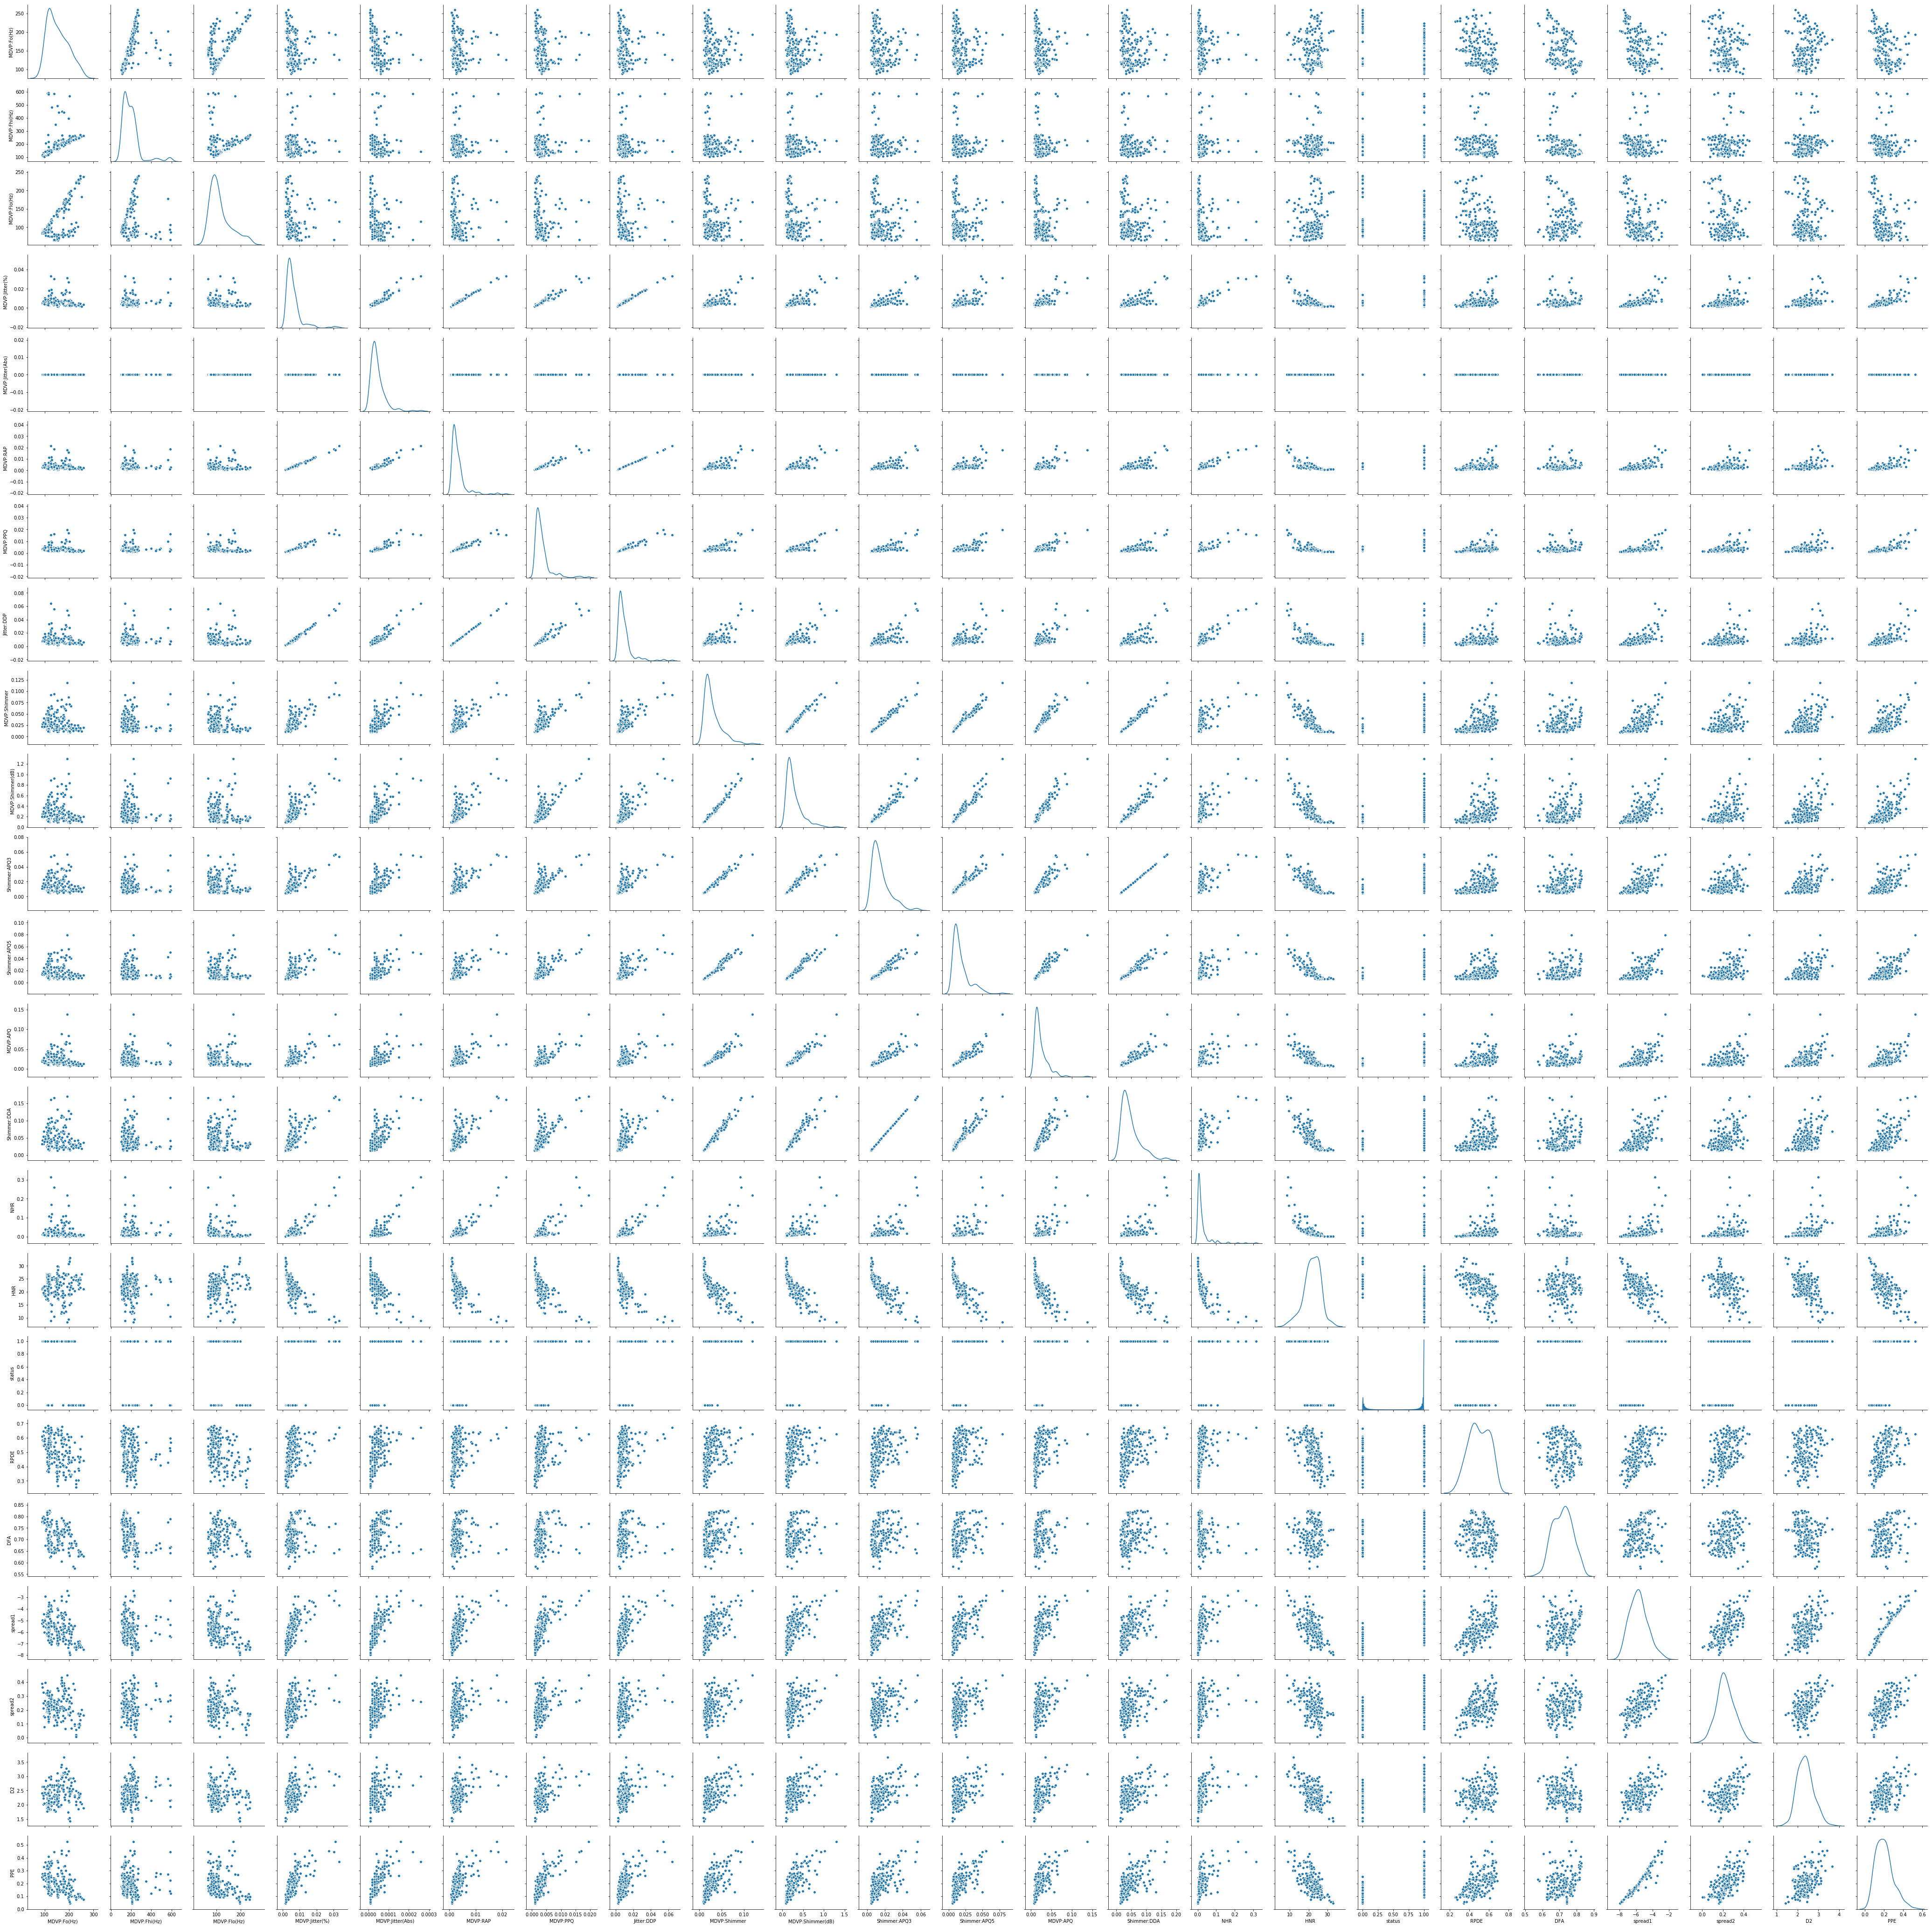

In [131]:
sns.pairplot(P, diag_kind='kde')

In [134]:
P.columns=['name', 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitterPerct',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [135]:
P.columns

Index(['name', 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitterPerct',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer',
       'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')

In [138]:
m1=smf.ols('status~MDVPFoHz+MDVPFhiHz+MDVPFloHz+MDVPJitterPerct+MDVPJitterAbs+MDVPRAP+MDVPPPQ+JitterDDP+MDVPShimmer+MDVPShimmerdB+ShimmerAPQ3+ShimmerAPQ5+MDVPAPQ+ShimmerDDA+NHR+HNR+RPDE+DFA+spread1+spread2+D2+PPE', P).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     7.594
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           4.81e-16
Time:                        12:00:47   Log-Likelihood:                -46.290
No. Observations:                 195   AIC:                             138.6
Df Residuals:                     172   BIC:                             213.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2248      1.158      1.921      0.056      -0.062       4.511
MDVPFoHz           -0.0024      0.002     -1.579      0.116      -0.005       0.001
MDVPFhiHz          -0.0001      0.000     -0.359      0.720      -0.001       0.001
MDVPFloHz          -0.0015      0.001     -1.913      0.057      -0.003    4.86e-05
MDVPJitterPerct  -176.9132     67.029     -2.639      0.009    -309.218     -44.609
MDVPJitterAbs   -3321.6359   4625.653     -0.718      0.474   -1.25e+04    5808.719
MDVPRAP          -759.2147   9331.877     -0.081      0.935   -1.92e+04    1.77e+04
MDVPPPQ           -36.1351     88.384     -0.409      0.683    -210.592     138.322
JitterDDP         360.5843   3111.477      0.116      0.908   -5781.012    6502.181
MDVPShimmer        27.4496     34.283      0.801      0.424     -40.220      95.119
MDVPShimmerdB       0.5710      1.199      0.476      0.635      -1.796       2.938
ShimmerAPQ3      -871.2402   8972.170     -0.097      0.923   -1.86e+04    1.68e+04
ShimmerAPQ5       -26.3959     20.123     -1.312      0.191     -66.116      13.324
MDVPAPQ            -3.0748     10.891     -0.282      0.778     -24.572      18.423
ShimmerDDA        283.7476   2989.957      0.095      0.925   -5617.985    6185.481
NHR                -2.5256      1.981     -1.275      0.204      -6.435       1.384
HNR                -0.0157      0.014     -1.094      0.275      -0.044       0.013
RPDE               -1.0145      0.440     -2.308      0.022      -1.882      -0.147
DFA                 0.3551      0.739      0.480      0.632      -1.104       1.815
spread1             0.1273      0.098      1.300      0.195      -0.066       0.321
spread2             1.2656      0.478      2.648      0.009       0.322       2.209
D2                  0.0495      0.114      0.433      0.666      -0.176       0.275
PPE                 1.2635      1.383      0.913      0.362      -1.467       3.994
==============================================================================
Omnibus:                       21.926   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.643
Skew:                          -0.838   Prob(JB):                     2.70e-06
Kurtosis:                       3.587   Cond. No.                     1.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
P.corr()

MDVPFoHz  MDVPFhiHz  MDVPFloHz  MDVPJitterPerct  \
MDVPFoHz         1.000000   0.400985   0.596546        -0.118003   
MDVPFhiHz        0.400985   1.000000   0.084951         0.102086   
MDVPFloHz        0.596546   0.084951   1.000000        -0.139919   
MDVPJitterPerct -0.118003   0.102086  -0.139919         1.000000   
MDVPJitterAbs   -0.382027  -0.029198  -0.277815         0.935714   
MDVPRAP         -0.076194   0.097177  -0.100519         0.990276   
MDVPPPQ         -0.112165   0.091126  -0.095828         0.974256   
JitterDDP       -0.076213   0.097150  -0.100488         0.990276   
MDVPShimmer     -0.098374   0.002281  -0.144543         0.769063   
MDVPShimmerdB   -0.073742   0.043465  -0.119089         0.804289   
ShimmerAPQ3     -0.094717  -0.003743  -0.150747         0.746625   
ShimmerAPQ5     -0.070682  -0.009997  -0.101095         0.725561   
MDVPAPQ         -0.077774   0.004937  -0.107293         0.758255   
ShimmerDDA      -0.094732  -0.003733  -0.150737         0.746635   
NHR             -0.021981   0.163766  -0.108670         0.906959   
HNR              0.059144  -0.024893   0.210851        -0.728165   
status          -0.383535  -0.166136  -0.380200         0.278220   
RPDE            -0.383894  -0.112404  -0.400143         0.360673   
DFA             -0.446013  -0.343097  -0.050406         0.098572   
spread1         -0.413738  -0.076658  -0.394857         0.693577   
spread2         -0.249450  -0.002954  -0.243829         0.385123   
D2               0.177980   0.176323  -0.100629         0.433434   
PPE             -0.372356  -0.069543  -0.340071         0.721543   

                 MDVPJitterAbs   MDVPRAP   MDVPPPQ  JitterDDP  MDVPShimmer  \
MDVPFoHz             -0.382027 -0.076194 -0.112165  -0.076213    -0.098374   
MDVPFhiHz            -0.029198  0.097177  0.091126   0.097150     0.002281   
MDVPFloHz            -0.277815 -0.100519 -0.095828  -0.100488    -0.144543   
MDVPJitterPerct       0.935714  0.990276  0.974256   0.990276     0.769063   
MDVPJitterAbs         1.000000  0.922911  0.897778   0.922913     0.703322   
MDVPRAP               0.922911  1.000000  0.957317   1.000000     0.759581   
MDVPPPQ               0.897778  0.957317  1.000000   0.957319     0.797826   
JitterDDP             0.922913  1.000000  0.957319   1.000000     0.759555   
MDVPShimmer           0.703322  0.759581  0.797826   0.759555     1.000000   
MDVPShimmerdB         0.716601  0.790652  0.839239   0.790621     0.987258   
ShimmerAPQ3           0.697153  0.744912  0.763580   0.744894     0.987625   
ShimmerAPQ5           0.648961  0.709927  0.786780   0.709907     0.982835   
MDVPAPQ               0.648793  0.737455  0.804139   0.737439     0.950083   
ShimmerDDA            0.697170  0.744919  0.763592   0.744901     0.987626   
NHR                   0.834972  0.919521  0.844604   0.919548     0.722194   
HNR                  -0.656810 -0.721543 -0.731510  -0.721494    -0.835271   
status                0.338653  0.266668  0.288698   0.266646     0.367430   
RPDE                  0.441839  0.342140  0.333274   0.342079     0.447424   
DFA                   0.175036  0.064083  0.196301   0.064026     0.159954   
spread1               0.735779  0.648328  0.716489   0.648328     0.654734   
spread2               0.388543  0.324407  0.407605   0.324377     0.452025   
D2                    0.310694  0.426605  0.412524   0.426556     0.507088   
PPE                   0.748162  0.670999  0.769647   0.671005     0.693771   

                 MDVPShimmerdB    ...     ShimmerDDA       NHR       HNR  \
MDVPFoHz             -0.073742    ...      -0.094732 -0.021981  0.059144   
MDVPFhiHz             0.043465    ...      -0.003733  0.163766 -0.024893   
MDVPFloHz            -0.119089    ...      -0.150737 -0.108670  0.210851   
MDVPJitterPerct       0.804289    ...       0.746635  0.906959 -0.728165   
MDVPJitterAbs         0.716601    ...       0.697170  0.834972 -0.656810   
MDVPRAP               0.790652    ...       0.744919  0

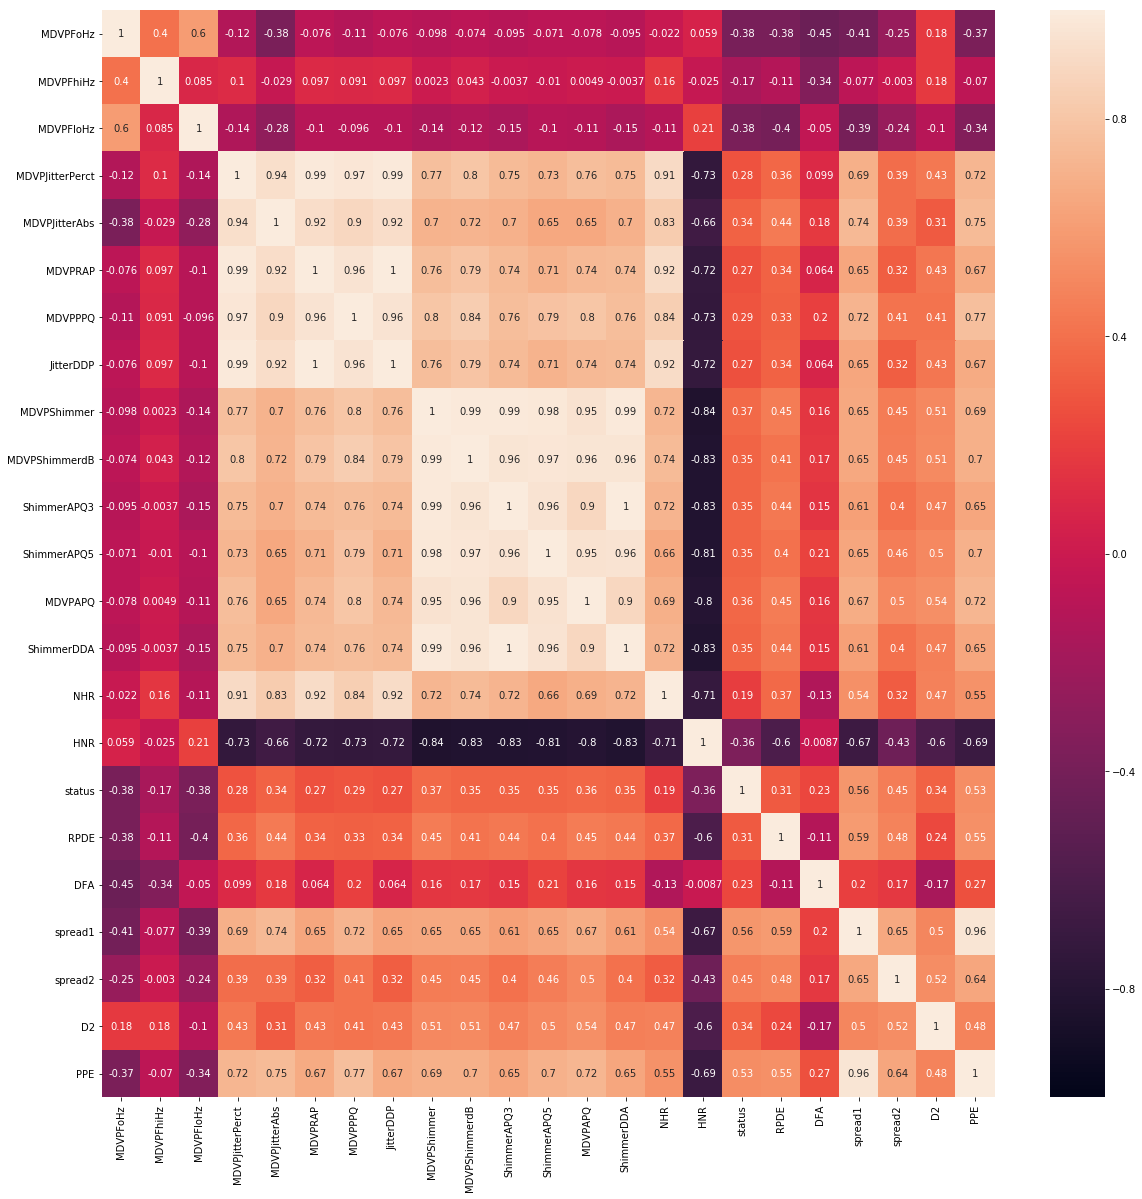

In [146]:
plt.figure(figsize=(20,20)) # 20X20 inches
sns.heatmap(P.corr(), vmin=-1, vmax=+1, annot=True)


In [147]:
x=P.drop(['status','name'],axis=1)
y=P[['status']]

In [153]:
pmodel = LogisticRegression()
pmodel.fit(x,y)
y_predict = pmodel.predict(x)

acc = metrics.accuracy_score(y,y_predict)
print(acc)
print(metrics.confusion_matrix(y,y_predict))

0.8769230769230769
[[ 30  18]
 [  6 141]]


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
#Sensitivity
TPR=141/(18+141)
TPR

0.8867924528301887

In [157]:
#specificity
TNR=30/(30+6)
TNR

0.8333333333333334

In [169]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)
pmodel1 = LogisticRegression()
pmodel1.fit(xtrain, ytrain)
y2_predict = pmodel1.predict(xtest)
acc1 = metrics.accuracy_score(ytest,y2_predict)
print(acc1)
print(metrics.confusion_matrix(ytest,y2_predict))

0.8135593220338984
[[10  9]
 [ 2 38]]


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
TPR=38/(38+9)

In [163]:
TNR=2/(10+2)

In [164]:
TPR,TNR

(0.8085106382978723, 0.16666666666666666)

In [165]:
pmodel1.score(xtrain,ytrain)

0.8897058823529411

In [166]:
pmodel1.score(xtest,ytest)

0.8135593220338984

0.7381578947368421


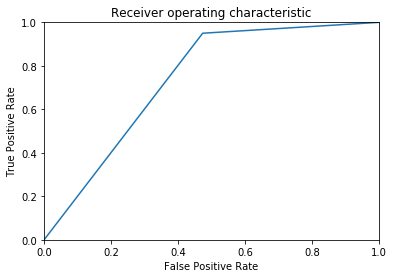

In [193]:
fpr,tpr, _ = roc_curve(ytest, y2_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [194]:
CR=metrics.classification_report(ytest,y2_predict)
print(CR)

             precision    recall  f1-score   support

          0       0.83      0.53      0.65        19
          1       0.81      0.95      0.87        40

avg / total       0.82      0.81      0.80        59



# INFERENCE
HERE WE HAVENT DROPPED ALL THE COLUMNS FROM X, THE ACCURACY OF THE MODEL IS 0.82, WHICH MEANS MODEL PREDICTION IS CORRECT 82%
OUR TPR(0.80)>TNR(0.16). THE POWER OF TEST IS HIGH(0.80). THE MODEL'S SENSITIVITY IS HIGHER THAN ITS SPECIFICITY.
THE AUC VALUE, THAT IS THE AREA UNDER THE CURVE IS 0.738, WHICH SAYS THAT OUR MODEL IS GOOD WHEN NO COLUMNS ARE DROPPED

In [175]:
x11=P[['MDVPJitterPerct','RPDE','spread2','MDVPFloHz']]
y11=P[['status']]

In [176]:
x1train, x1test, y1train, y1test = train_test_split(x11, y11, test_size=0.3, random_state=1)
pmodel1 = LogisticRegression()
pmodel1.fit(x1train, y1train)
y3_predict = pmodel1.predict(x1test)
acc3 = metrics.accuracy_score(y1test,y3_predict)
print(acc3)
print(metrics.confusion_matrix(y1test,y3_predict))

0.7288135593220338
[[ 3 16]
 [ 0 40]]


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
TPR11=40/(40+16)
TPR11

0.7142857142857143

In [180]:
TNR11=3/(3+0)
TNR11

1.0

In [188]:
pmodel1.score(x1test,y1test)

0.7288135593220338

In [181]:
CR11=metrics.classification_report(y1test,y3_predict)
print(CR11)

             precision    recall  f1-score   support

          0       1.00      0.16      0.27        19
          1       0.71      1.00      0.83        40

avg / total       0.81      0.73      0.65        59



In [182]:
from sklearn import preprocessing


In [183]:
X_train_scaled = preprocessing.scale(x1train)
X_test_scaled = preprocessing.scale(x1test)

In [187]:
pmodel11 = LogisticRegression()
pmodel11.fit(X_train_scaled, y1train)
y5_predict = pmodel11.predict(X_test_scaled)
model_score = pmodel11.score(X_test_scaled, y1test)
print(model_score)


0.7966101694915254


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
CR_scaling=metrics.classification_report(y1test,y5_predict)
print(CR_scaling)

             precision    recall  f1-score   support

          0       0.89      0.42      0.57        19
          1       0.78      0.97      0.87        40

avg / total       0.82      0.80      0.77        59



In [195]:
print(metrics.confusion_matrix(y1test,y5_predict))

[[ 8 11]
 [ 1 39]]


In [196]:
TPR=39/(39+11)
TNR=8/9
TPR,TNR

(0.78, 0.8888888888888888)

0.6980263157894737


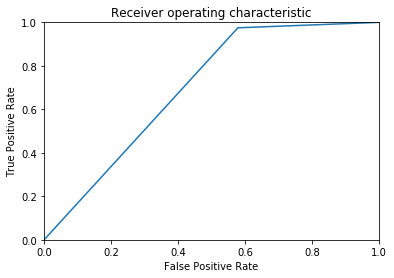

In [192]:
fpr,tpr, _ = roc_curve(y1test, y5_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# INFERENCE
HERE WE HAVE TAKE ONLY 4 COLUMNS WITH LOW P(t) FROM X, THE ACCURACY OF THE MODEL IS 0.79, WHICH IS LOWER THAN THE PREVIOUS ONE, WHICH MEANS MODEL PREDICTION IS CORRECT 79%
OUR TPR(0.78)<TNR(0.88). THE SPECIFICITYOF TEST IS HIGHER. 
THE AUC VALUE, THAT IS THE AREA UNDER THE CURVE IS 0.698, WHICH SAYS THAT OUR MODEL IS AN AVERAGE MODEL WHEN MOST COLUMNS ARE DROPPED